<a href="https://colab.research.google.com/github/nparra75/CreditCardFraudDetection/blob/main/fashion_mnist_with_pytorch_93_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This is the tutorial of deep learning on FashionMNIST dataset using Pytorch. We will build a Convolutional Neural Network for predicting the classes of Dataset. Neural networks are a class of models inspired by the structure and function of the human brain. They are composed of interconnected nodes called neurons organized into layers. Each neuron receives input, performs a computation, and passes its output to the neurons in the next layer.

Types of Algorithms used in Deep Learning
Here is the list of top 10 most popular deep learning algorithms:

Convolutional Neural Networks (CNNs)
Long Short Term Memory Networks (LSTMs)
Recurrent Neural Networks (RNNs)
Generative Adversarial Networks (GANs)
Radial Basis Function Networks (RBFNs)
Multilayer Perceptrons (MLPs)
Self Organizing Maps (SOMs)
Deep Belief Networks (DBNs)
Restricted Boltzmann Machines( RBMs)
Autoencoders

# **Importing Important Libraries**

`import torch`: This imports the PyTorch library. PyTorch is an open-source deep learning framework developed by Facebook's AI Research lab.
 `import torch.nn as nn`: This imports the neural network module (`nn`) from PyTorch. It provides various classes and functions for building neural networks.
`from torch.autograd import Variable`: This imports the `Variable` class from the `autograd` module in PyTorch. `Variable` is a wrapper around tensors that allows automatic differentiation, which is crucial for training neural networks.

`import torchvision`: This imports the torchvision library, which provides datasets, model architectures, and utilities for working with computer vision tasks in PyTorch.

 `import torchvision.transforms as transforms`: This imports the `transforms` module from torchvision. Transformations are used to preprocess data before feeding it into the neural network.

`from torch.utils.data import Dataset, DataLoader`: This imports the `Dataset` and `DataLoader` classes from the `utils.data` module in PyTorch. They are used for creating custom datasets and data loaders, respectively.
 A data loader can be used in a loop to iterate over batches of data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix

### If the GPU is available use it for the computation otherwise use the CPU. GPUs, or Graphics Processing Units, are specialized hardware units originally designed for rendering graphics in computer games and multimedia applications. However, due to their highly parallel architecture, they have found extensive use in various computational tasks, including machine learning and deep learning.

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

CUDA, or Compute Unified Device Architecture, is a parallel computing platform and programming model developed by NVIDIA. It allows developers to use NVIDIA graphics processing units (GPUs) for general-purpose processing, including complex mathematical computations and data processing tasks.



1. **Class Definition**:
   ```python
   class FashionDataset(Dataset):
   ```
   - This line defines a new class named `FashionDataset`. The class inherits from PyTorch's `Dataset` class, indicating that it will be used to create a custom dataset compatible with PyTorch's data loading utilities.

2. **Class Documentation**:
   ```python
   """User defined class to build a datset using Pytorch class Dataset."""
   ```
   - This is a docstring, providing a brief description of the purpose of the class. It explains that the class is used to build a dataset using PyTorch's `Dataset` class.

3. **Initialization Method (`__init__`)**:
   ```python
   def __init__(self, data, transform=None):
   ```
   - This method is called when an instance of the class is created.
   - It takes two parameters: `data`, which represents the dataset, and `transform`, which is an optional parameter for data transformations.
   
4. **Data Processing**:
   ```python
   self.fashion_MNIST = list(data.values)
   ```
   - Converts the input data (assumed to be in dictionary format) into a list.
   
   ```python
   label = []
   image = []
   for i in self.fashion_MNIST:
       label.append(i[0])
       image.append(i[1:])
   ```
   - Separates the labels and images from the input data.
   
   ```python
   self.labels = np.asarray(label)
   self.images = np.asarray(image).reshape(-1, 28, 28, 1).astype('float32')
   ```
   - Converts the labels and images into NumPy arrays.
   - Reshapes the images into the required format of (batch_size, height, width, channels) where each image is of size 28x28 with 1 channel (grayscale).
   
5. **Get Item Method (`__getitem__`)**:
   ```python
   def __getitem__(self, index):
   ```
   - This method retrieves an item (image and label) from the dataset based on the provided index.
   
   ```python
   label = self.labels[index]
   image = self.images[index]
   ```
   - Retrieves the label and image corresponding to the given index.
   
   ```python
   if self.transform is not None:
       image = self.transform(image)
   ```
   - Applies any specified transformations to the image using the `transform` parameter.
   
   ```python
   return image, label
   ```
   - Returns the image and label as a tuple.
   
6. **Length Method (`__len__`)**:
   ```python
   def __len__(self):
   ```
   - This method returns the total number of images in the dataset.
   
   ```python
   return len(self.images)
   ```
   - Returns the length of the dataset, which is equal to the number of images.

This class can be used to create a custom dataset for Fashion MNIST images, which can then be loaded into a PyTorch DataLoader for training neural networks or other machine learning tasks.





In [ ]:
class FashionDataset(Dataset):
    """User defined class to build a dataset using Pytorch class Dataset."""

    def __init__(self, data, transform = None):
        """Method to initilaize variables."""
        self.fashion_MNIST = list(data.values)
        self.transform = transform

        label = []
        image = []

        for i in self.fashion_MNIST:
             # first column is of labels.
            label.append(i[0])
            image.append(i[1:])
        self.labels = np.asarray(label)
        # Dimension of Images = 28 * 28 * 1. where height = width = 28 and color_channels = 1.
        self.images = np.asarray(image).reshape(-1, 28, 28, 1).astype('float32')

    def __getitem__(self, index):
        label = self.labels[index]
        image = self.images[index]

        if self.transform is not None:
            image = self.transform(image)

        return image, label

    def __len__(self):
        return len(self.images)

### 2. Using FashionMNIST class from torchvision module.


*   It will download the dataset first time.




In [ ]:
train_set = torchvision.datasets.FashionMNIST("./data", download=True, transform=
                                                transforms.Compose([transforms.ToTensor()]))
test_set = torchvision.datasets.FashionMNIST("./data", download=True, train=False, transform=
                                               transforms.Compose([transforms.ToTensor()]))


In [ ]:
train_loader = torch.utils.data.DataLoader(train_set,
                                           batch_size=100)
test_loader = torch.utils.data.DataLoader(test_set,
                                          batch_size=100)


### We have 10 types of clothes in FashionMNIST dataset.


> Making a method that return the name of class for the label number.
ex. if the label is 5, we return Sandal.



In [ ]:
def output_label(label):
    output_mapping = {
                 0: "T-shirt/Top",
                 1: "Trouser",
                 2: "Pullover",
                 3: "Dress",
                 4: "Coat",
                 5: "Sandal",
                 6: "Shirt",
                 7: "Sneaker",
                 8: "Bag",
                 9: "Ankle Boot"
                 }
    input = (label.item() if type(label) == torch.Tensor else label)
    return output_mapping[input]

This function `output_label` is designed to map numerical labels to their corresponding textual descriptions based on a predefined mapping dictionary. Here's an explanation of the code:

1. **Function Definition**:
   ```python
   def output_label(label):
   ```
   - This line defines a function named `output_label` that takes a single parameter `label`.

2. **Output Mapping Dictionary**:
   ```python
   output_mapping = {
       0: "T-shirt/Top",
       1: "Trouser",
       2: "Pullover",
       3: "Dress",
       4: "Coat",
       5: "Sandal",
       6: "Shirt",
       7: "Sneaker",
       8: "Bag",
       9: "Ankle Boot"
   }
   ```
   - This dictionary maps numerical labels (0 to 9) to their corresponding textual descriptions.

3. **Label Extraction**:
   ```python
   input = (label.item() if type(label) == torch.Tensor else label)
   ```
   - This line extracts the numerical label from the input parameter.
   - If the input is a PyTorch tensor, it uses the `.item()` method to retrieve the numerical value. Otherwise, it assumes the input is already a numerical label.

4. **Label Mapping**:
   ```python
   return output_mapping[input]
   ```
   - This line returns the textual description corresponding to the input numerical label based on the mapping dictionary.
   - For example, if the input label is `1`, it returns `"Trouser"`.



### Playing with data and displaying some images using matplotlib imshow() method.





In [ ]:
a = next(iter(train_loader))
a[0].size()

torch.Size([100, 1, 28, 28])

fetching the first batch of data from the train_loader DataLoader object and then accessing the size of the input data (images) in the first batch

In [ ]:
len(train_set)

60000

9


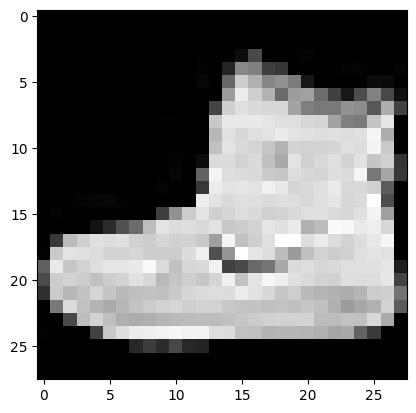

In [ ]:
image, label = next(iter(train_set))
plt.imshow(image.squeeze(), cmap="gray")
print(label)

 fetch a single data sample (image and label) from the `train_set` dataset and then visualize the image using matplotlib's `imshow()` function.

1. `image, label = next(iter(train_set))`:
   - This line fetches a single data sample (image and label) from the `train_set` dataset.
   - It uses `iter(train_set)` to create an iterator from the dataset and `next()` to fetch the next item from the iterator.
   
2. `plt.imshow(image.squeeze(), cmap="gray")`:
   - This line visualizes the fetched image using matplotlib's `imshow()` function.
  


In [ ]:
demo_loader = torch.utils.data.DataLoader(train_set, batch_size=10)

batch = next(iter(demo_loader))
images, labels = batch
print(type(images), type(labels))
print(images.shape, labels.shape)

<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([10, 1, 28, 28]) torch.Size([10])


 a DataLoader named demo_loader is created from the train_set dataset with a batch size of 10. Then, a single batch of data is fetched from demo_loader using the next() function and printed to examine its structure.

labels:  Ankle Boot, T-shirt/Top, T-shirt/Top, Dress, T-shirt/Top, Pullover, Sneaker, Pullover, Sandal, Sandal, 

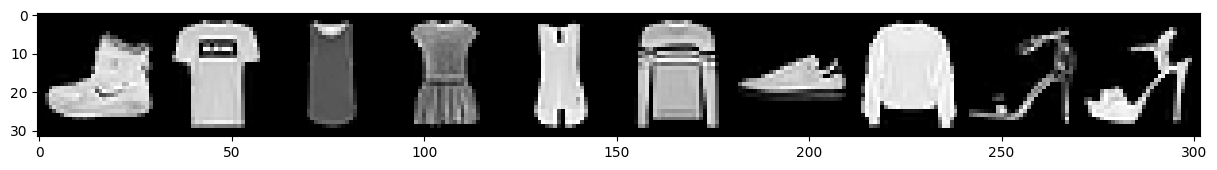

In [ ]:
grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15, 20))
plt.imshow(np.transpose(grid, (1, 2, 0)))
print("labels: ", end=" ")
for i, label in enumerate(labels):
    print(output_label(label), end=", ")


The provided code snippet utilizes torchvision's `make_grid()` function to create a grid of images from a batch of image tensors (`images`). It then visualizes this grid of images using matplotlib. Additionally, it prints out the textual labels corresponding to each image in the batch. Here's a breakdown of the code:

```python
grid = torchvision.utils.make_grid(images, nrow=10)
```
- This line uses torchvision's `make_grid()` function to arrange the images in a grid. The `images` tensor, representing a batch of images, is provided as input.
- The `nrow` parameter specifies the number of images to display in each row of the grid.

```python
plt.figure(figsize=(15, 20))
```
- This line creates a new figure with a specified figure size using matplotlib. The figure size is set to 15x20 inches.

```python
plt.imshow(np.transpose(grid, (1, 2, 0)))
```
- This line visualizes the grid of images using matplotlib's `imshow()` function. It transposes the grid tensor using NumPy's `transpose()` function to rearrange the dimensions to match the expected format for displaying images (height x width x channels).

```python
print("labels: ", end=" ")
for i, label in enumerate(labels):
    print(output_label(label), end=", ")
```
- This code block iterates over the labels in the batch (`labels`) and prints out the corresponding textual labels using the `output_label()` function.
- The `enumerate()` function is used to iterate over both the indices and values of the `labels` tensor.
- The `output_label()` function is assumed to map numerical labels to their corresponding textual descriptions.

By executing these lines of code, you can visualize a grid of images from the batch along with their corresponding textual labels. This provides a convenient way to inspect and understand the content of a batch of images in the dataset.________________________________________________________________________________________

## Building a CNN


*   Make a model class (FashionCNN in our case)
    * It inherit nn.Module class that is a super class for all the neural networks in Pytorch.
* Our Neural Net has following layers:
    * Two Sequential layers each consists of following layers-
        * Convolution layer that has kernel size of 3 * 3, padding = 1 (zero_padding) in 1st layer and padding = 0 in second one. Stride of 1 in both layer.
        * Batch Normalization layer.
        * Acitvation function: ReLU.
        * Max Pooling layer with kernel size of 2 * 2 and stride 2.
     * Flatten out the output for dense layer(a.k.a. fully connected layer).
     * 3 Fully connected layer  with different in/out features.
     * 1 Dropout layer that has class probability p = 0.25.
  
     * All the functionaltiy is given in forward method that defines the forward pass of CNN.
     * Our input image is changing in a following way:
        * First Convulation layer : input: 28 \* 28 \* 3, output: 28 \* 28 \* 32
        * First Max Pooling layer : input: 28 \* 28 \* 32, output: 14 \* 14 \* 32
        * Second Conv layer : input : 14 \* 14 \* 32, output: 12 \* 12 \* 64
        * Second Max Pooling layer : 12 \* 12 \* 64, output:  6 \* 6 \* 64
    * Final fully connected layer has 10 output features for 10 types of clothes.

> Lets implement the network...





In [ ]:
class FashionCNN(nn.Module):

    def __init__(self):
        super(FashionCNN, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.fc1 = nn.Linear(in_features=64*6*6, out_features=600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)

        return out


The provided code defines a convolutional neural network (CNN) architecture using PyTorch's `nn.Module` class. Let's break down each part of the code:

1. **Class Definition**:
   - `class FashionCNN(nn.Module):`: Defines a new class named `FashionCNN` that inherits from PyTorch's `nn.Module` class. This class represents the CNN model architecture.

2. **Initialization Method** (`__init__`):
   - `def __init__(self):`: Initializes the attributes and layers of the CNN model.
   - `super(FashionCNN, self).__init__()`: Calls the constructor of the parent class (`nn.Module`) to initialize the inherited attributes.

3. **Layer Definitions**:
   - `self.layer1`: Defines the first convolutional layer followed by batch normalization, ReLU activation, and max pooling.
     - `nn.Conv2d`: Creates a 2D convolutional layer with specified parameters such as input channels, output channels, kernel size, and padding.
     - `nn.BatchNorm2d`: Adds batch normalization to normalize the activations of the previous layer.
     - `nn.ReLU`: Applies the Rectified Linear Unit (ReLU) activation function to introduce non-linearity.
     - `nn.MaxPool2d`: Performs 2D max pooling to downsample the spatial dimensions of the feature maps.
   - `self.layer2`: Defines the second convolutional layer with similar operations as `self.layer1`.
   - `self.fc1`, `self.fc2`, `self.fc3`: Define fully connected (linear) layers.
     - `nn.Linear`: Creates a fully connected layer with specified input and output features.
   - `self.drop`: Defines a dropout layer to prevent overfitting by randomly setting a fraction of input units to zero during training.

4. **Forward Method**:
   - `def forward(self, x):`: Defines the forward pass of the model.
   - `out = self.layer1(x)`: Passes the input `x` through the first convolutional layer and subsequent operations defined in `self.layer1`.
   - `out = self.layer2(out)`: Passes the output of `self.layer1` through the second convolutional layer and subsequent operations defined in `self.layer2`.
   - `out = out.view(out.size(0), -1)`: Flattens the 4D tensor `out` into a 2D tensor to prepare it for the fully connected layers.
   - `out = self.fc1(out)`: Passes the flattened tensor through the first fully connected layer.
   - `out = self.drop(out)`: Applies dropout regularization to the output of the first fully connected layer.
   - `out = self.fc2(out)`: Passes the output of the dropout layer through the second fully connected layer.
   - `out = self.fc3(out)`: Passes the output of the second fully connected layer through the final fully connected layer.
   - `return out`: Returns the output tensor.



### Making a model of our CNN class

*   Creating a object(model in the code)
*   Transfering it into GPU if available.
*  Defining a Loss function. we're using CrossEntropyLoss() here.
*  Using Adam algorithm for optimization purpose.



In [ ]:
model = FashionCNN()
model.to(device)

error = nn.CrossEntropyLoss()

learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

FashionCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


## Training a network and Testing it on test dataset

In [ ]:
num_epochs = 1
count = 0
# Lists for visualization of loss and accuracy
loss_list = []
iteration_list = []
accuracy_list = []

# Lists for knowing classwise accuracy
predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels in train_loader:
        # Transfering images and labels to GPU if available
        images, labels = images.to(device), labels.to(device)

        train = Variable(images.view(100, 1, 28, 28))
        labels = Variable(labels)

        # Forward pass
        outputs = model(train)
        loss = error(outputs, labels)

        # Initializing a gradient as 0 so there is no mixing of gradient among the batches
        optimizer.zero_grad()

        #Propagating the error backward
        loss.backward()

        # Optimizing the parameters
        optimizer.step()

        count += 1

    # Testing the model

        if not (count % 50):    # It's same as "if count % 50 == 0"
            total = 0
            correct = 0

            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)

                test = Variable(images.view(100, 1, 28, 28))

                outputs = model(test)

                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()

                total += len(labels)

            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)

        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))


### Visualizing the Loss and Accuracy with Iterations




- **num_epochs**: Number of epochs to train the model. In this case, it's set to 1, meaning the model will be trained over the entire training dataset once.
- **count**: Variable to keep track of the number of iterations (batches processed) during training.
- **loss_list, iteration_list, accuracy_list**: Lists used for visualization of loss and accuracy during training.
- **predictions_list, labels_list**: Lists used for storing predictions and labels to calculate accuracy.
- **for epoch in range(num_epochs):**: Iterates over the specified number of epochs.
- **for images, labels in train_loader:**: Iterates over batches of data in the training loader.
- **images, labels = images.to(device), labels.to(device)**: Transfers the images and labels to the GPU if available, to accelerate computation.
- **Forward Pass**: Passes the input images through the model to get the predicted outputs.
- **loss = error(outputs, labels)**: Calculates the loss using the defined loss function (in this case, Cross Entropy Loss).
- **optimizer.zero_grad()**: Initializes the gradients to zero before the backward pass.
- **loss.backward()**: Backpropagates the loss to compute gradients.
- **optimizer.step()**: Updates the model parameters using the computed gradients.
- **count += 1**: Increments the count of iterations.
- **Testing the Model**: Evaluates the model's performance on the test dataset.
- **if not (count % 50):**: Checks if it's every 50th iteration.
- **for images, labels in test_loader:**: Iterates over batches of data in the test loader.
- **Calculating Accuracy**: Compares the model's predictions with the actual labels to compute the accuracy.
- **if not (count % 500):**: Checks if it's every 500th iteration.
- **print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))**: Prints the iteration number, loss, and accuracy every 500 iterations.

This code snippet essentially trains the model, evaluates its performance, and keeps track of loss and accuracy metrics during the training process. It provides insights into how the model is learning and improving over time.

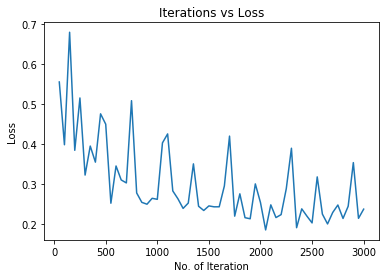

In [ ]:
plt.plot(iteration_list, loss_list)
plt.xlabel("No. of Iteration")
plt.ylabel("Loss")
plt.title("Iterations vs Loss")
plt.show()



- **plt.plot(iteration_list, loss_list)**: This line of code creates a line plot where `iteration_list` is plotted on the x-axis and `loss_list` is plotted on the y-axis. The `iteration_list` contains the number of iterations (or batches) processed during training, while the `loss_list` contains the corresponding loss values computed during each iteration.

- **plt.xlabel("No. of Iteration")**: This sets the label for the x-axis of the plot as "No. of Iteration", indicating the number of iterations processed during training.

- **plt.ylabel("Loss")**: This sets the label for the y-axis of the plot as "Loss", indicating the loss values computed during training.

- **plt.title("Iterations vs Loss")**: This sets the title of the plot as "Iterations vs Loss", providing a brief description of what the plot represents.

- **plt.show()**: This line of code displays the plot on the screen.

Overall, this code snippet generates a line plot that visualizes how the loss values change over the course of training, providing insights into the convergence and performance of the machine learning model.

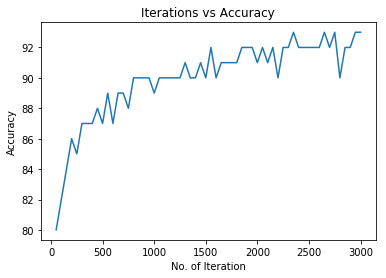

In [ ]:
plt.plot(iteration_list, accuracy_list)
plt.xlabel("No. of Iteration")
plt.ylabel("Accuracy")
plt.title("Iterations vs Accuracy")
plt.show()



- **plt.plot(iteration_list, accuracy_list)**: This line of code creates a line plot where `iteration_list` is plotted on the x-axis and `accuracy_list` is plotted on the y-axis. The `iteration_list` contains the number of iterations (or batches) processed during training, while the `accuracy_list` contains the corresponding accuracy values computed during each iteration.

- **plt.xlabel("No. of Iteration")**: This sets the label for the x-axis of the plot as "No. of Iteration", indicating the number of iterations processed during training.

- **plt.ylabel("Accuracy")**: This sets the label for the y-axis of the plot as "Accuracy", indicating the accuracy values computed during training.

- **plt.title("Iterations vs Accuracy")**: This sets the title of the plot as "Iterations vs Accuracy", providing a brief description of what the plot represents.

- **plt.show()**: This line of code displays the plot on the screen.

Similar to the loss plot, this plot provides insights into how the accuracy of the model changes over the course of training, helping to monitor the performance and convergence of the machine learning model.

### Looking the Accuracy in each class of FashionMNIST dataset

In [ ]:
class_correct = [0. for _ in range(10)]
total_correct = [0. for _ in range(10)]

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        test = Variable(images)
        outputs = model(test)
        predicted = torch.max(outputs, 1)[1]
        c = (predicted == labels).squeeze()

        for i in range(100):
            label = labels[i]
            class_correct[label] += c[i].item()
            total_correct[label] += 1

for i in range(10):
    print("Accuracy of {}: {:.2f}%".format(output_label(i), class_correct[i] * 100 / total_correct[i]))

Accuracy of T-shirt/Top: 86.80%
Accuracy of Trouser: 99.30%
Accuracy of Pullover: 89.03%
Accuracy of Dress: 97.57%
Accuracy of Coat: 88.78%
Accuracy of Sandal: 97.57%
Accuracy of Shirt: 82.42%
Accuracy of Sneaker: 97.27%
Accuracy of Bag: 99.48%
Accuracy of Ankle Boot: 98.83%




- **class_correct**: A list of length 10, initialized with zeros, to store the number of correct predictions for each class.
- **total_correct**: A list of length 10, initialized with zeros, to store the total number of predictions for each class.
- **torch.no_grad()**: A context manager that disables gradient computation, reducing memory consumption and speeding up computations, as gradients are not needed during inference.
- **for images, labels in test_loader**: Iterates over batches of images and labels in the test loader.
- **images, labels = images.to(device), labels.to(device)**: Transfers images and labels to the device (GPU or CPU) for computation.
- **test = Variable(images)**: Wraps the images in a `Variable` for inference. (Note: In newer versions of PyTorch, `Variable` is no longer needed, as tensors are by default tracked for gradient computation).
- **outputs = model(test)**: Forward pass through the model to get the predicted outputs.
- **predicted = torch.max(outputs, 1)[1]**: Extracts the predicted class labels by taking the index of the maximum value along the second dimension of the output tensor.
- **c = (predicted == labels).squeeze()**: Compares the predicted labels with the true labels and squeezes the tensor to remove dimensions of size 1.
- **for i in range(100)**: Iterates over each prediction in the batch.
- **label = labels[i]**: Gets the true label for the current prediction.
- **class_correct[label] += c[i].item()**: Updates the count of correct predictions for the corresponding class.
- **total_correct[label] += 1**: Updates the total count of predictions for the corresponding class.
- **for i in range(10)**: Iterates over each class.
- **print("Accuracy of {}: {:.2f}%".format(output_label(i), class_correct[i] * 100 / total_correct[i]))**: Prints the accuracy of each class in the format "Accuracy of [class_name]: [accuracy]%". The `output_label` function maps class indices to class names.

### Printing the Confusion Matrix

In [ ]:
from itertools import chain

predictions_l = [predictions_list[i].tolist() for i in range(len(predictions_list))]
labels_l = [labels_list[i].tolist() for i in range(len(labels_list))]
predictions_l = list(chain.from_iterable(predictions_l))
labels_l = list(chain.from_iterable(labels_l))

In [ ]:
 import sklearn.metrics as metrics

confusion_matrix(labels_l, predictions_l)
print("Classification report for CNN :\n%s\n"
      % (metrics.classification_report(labels_l, predictions_l)))

Classification report for CNN :
              precision    recall  f1-score   support

           0       0.85      0.86      0.85    360000
           1       0.98      0.99      0.98    360000
           2       0.84      0.86      0.85    360000
           3       0.89      0.92      0.90    360000
           4       0.85      0.83      0.84    360000
           5       0.97      0.98      0.98    360000
           6       0.75      0.71      0.73    360000
           7       0.95      0.96      0.95    360000
           8       0.98      0.98      0.98    360000
           9       0.97      0.96      0.96    360000

   micro avg       0.90      0.90      0.90   3600000
   macro avg       0.90      0.90      0.90   3600000
weighted avg       0.90      0.90      0.90   3600000





```

- **from itertools import chain**: Importing the `chain` function from the `itertools` module. The `chain` function is used to concatenate iterables together.
- **predictions_l**: A list comprehension that iterates over each element in the `predictions_list`, converts each element to a list, and stores the result in a new list `predictions_l`.
- **labels_l**: A list comprehension that iterates over each element in the `labels_list`, converts each element to a list, and stores the result in a new list `labels_l`.
- **list(chain.from_iterable(predictions_l))**: The `chain.from_iterable` function is used to concatenate the sublists in `predictions_l` into a single list. This operation flattens the list of predictions.
- **list(chain.from_iterable(labels_l))**: Similar to the previous line, this operation flattens the list of labels.

After executing these lines of code, `predictions_l` and `labels_l` will contain flattened lists of predictions and labels, respectively. This flattening process is often done to prepare the data for further analysis, such as computing performance metrics or generating visualizations.



- **import sklearn.metrics as metrics**: Imports the `sklearn.metrics` module, which provides functions for evaluating machine learning models.
- **confusion_matrix(labels_l, predictions_l)**: This line computes the confusion matrix based on the true labels (`labels_l`) and the predicted labels (`predictions_l`). However, it seems that the result of the confusion matrix calculation is not assigned to any variable or printed.
- **print("Classification report for CNN :\n%s\n" % (metrics.classification_report(labels_l, predictions_l)))**: This line prints the classification report for the model's predictions. The `classification_report` function from the `metrics` module takes the true labels (`labels_l`) and the predicted labels (`predictions_l`) as input and generates a report containing various evaluation metrics such as precision, recall, F1-score, and support for each class. The `%s` placeholder is used to format the string, and `% (metrics.classification_report(labels_l, predictions_l))` inserts the classification report into the string.

